In [3]:
import numpy as np
from numpy import pi
from math import dist
from ripser import ripser
from persim import plot_diagrams
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import paired_distances

import kmapper as km
from kmapper import jupyter # Creates custom CSS full-size Jupyter screen

import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

# C1

In [284]:
isoms = generate_c2_isoms(1000, 3, 3)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C2(isoms[i], isoms[j],3,3)

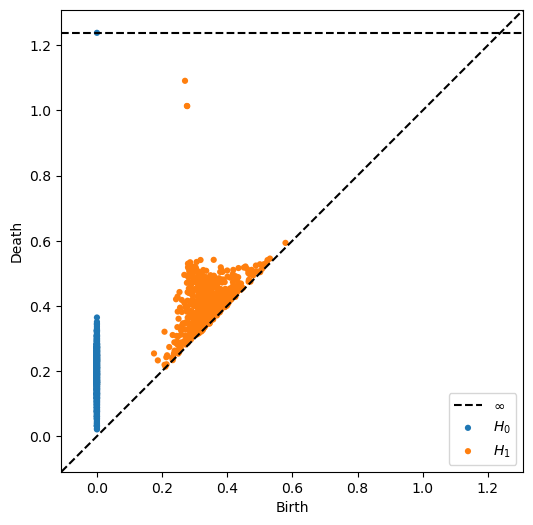

In [285]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [286]:
persistent_H1_intervals(output)

[0.8207438886165619,
 0.7377379536628723,
 0.7360919713973999,
 0.25016531348228455,
 0.2478313446044922,
 0.2419012188911438,
 0.23906904458999634,
 0.23441272974014282,
 0.2336842119693756,
 0.23238015174865723,
 0.2289644181728363,
 0.22707146406173706,
 0.22676587104797363,
 0.22583356499671936,
 0.2235281765460968,
 0.22290340065956116,
 0.22153562307357788,
 0.21956926584243774,
 0.21639838814735413,
 0.21512651443481445,
 0.21070295572280884,
 0.20926210284233093,
 0.2089376449584961,
 0.20865169167518616,
 0.20693781971931458,
 0.20619899034500122,
 0.2049630582332611,
 0.2044340968132019,
 0.20440897345542908,
 0.20405036211013794,
 0.2029256522655487,
 0.195875346660614,
 0.19461601972579956,
 0.19337791204452515,
 0.19204163551330566,
 0.18907380104064941,
 0.1866857409477234,
 0.18544387817382812,
 0.18365761637687683,
 0.18295449018478394,
 0.1810402125120163,
 0.1807791292667389,
 0.18027165532112122,
 0.18025454878807068,
 0.177626371383667,
 0.17732703685760498,
 0.1770

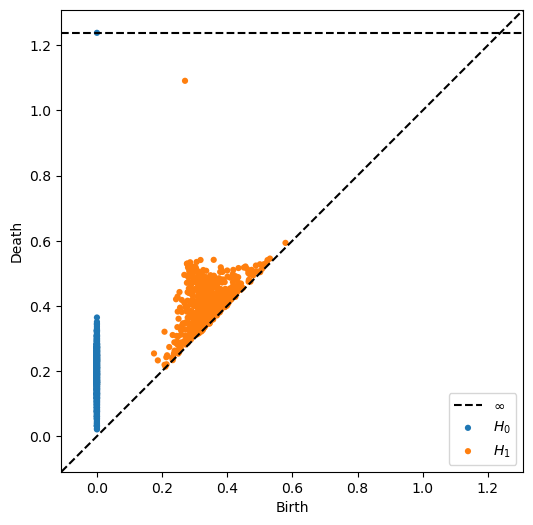

In [287]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [288]:
persistent_H1_intervals(output)

[0.8207438886165619,
 0.25353455543518066,
 0.2523283362388611,
 0.2478313446044922,
 0.24733129143714905,
 0.2419012188911438,
 0.23906904458999634,
 0.23441272974014282,
 0.2336842119693756,
 0.23238015174865723,
 0.2289644181728363,
 0.22707146406173706,
 0.22676587104797363,
 0.22583356499671936,
 0.2235281765460968,
 0.22290340065956116,
 0.22153562307357788,
 0.21956926584243774,
 0.21639838814735413,
 0.21512651443481445,
 0.21070295572280884,
 0.20926210284233093,
 0.2089376449584961,
 0.20865169167518616,
 0.20693781971931458,
 0.20619899034500122,
 0.2049630582332611,
 0.2044340968132019,
 0.20440897345542908,
 0.20405036211013794,
 0.2029256522655487,
 0.195875346660614,
 0.19461601972579956,
 0.19337791204452515,
 0.19204163551330566,
 0.18907380104064941,
 0.1866857409477234,
 0.18544387817382812,
 0.18365761637687683,
 0.18295449018478394,
 0.1810402125120163,
 0.1807791292667389,
 0.18027165532112122,
 0.18025454878807068,
 0.177626371383667,
 0.17732703685760498,
 0.177

# C3

In [180]:
def distance_C3(x, y, a):
    
    # no translation in rotation axis
    Y = []
    tri = (math.sqrt(3)/2)
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([y[0] + math.sqrt(3) * a * option_a + option_b * 1.5 * a + option_c * 1.5 * a,
                          y[1] + math.sqrt(3) * a * option_a - option_b * tri * a + option_c * tri * a,
                          y[2]])
                      
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([ -.5 * y[0] + 1.5 * a - tri * y[1] + math.sqrt(3) * a * option_a + option_b * 1.5 * a + option_c * 1.5 * a,
                           -.5 * y[1] + tri * y[0] - tri * a + math.sqrt(3) * a * option_a - option_b * tri * a + option_c * tri * a,
                           y[2] + (2 * math.pi / 3)])
                
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([ -.5 * y[0] + 1.5 * a + tri * y[1] + math.sqrt(3) * a * option_a + option_b * 1.5 * a + option_c * 1.5 * a,
                           -.5 * y[1] - tri * y[0] + tri * a + math.sqrt(3) * a * option_a - option_b * tri * a + option_c * tri * a,
                           y[2] - (2 * math.pi / 3)])    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [181]:
def distance_C3_correct(x, y, a):
    
   # no translation in rotation axis
    Y = [y] # no translation in any axis
    for i in [1,-1]:
        Y.append((y[0], y[1]+ i * (3**0.5) * a, y[2])) # front and back
        Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
        Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB
        
    # rotate by 2pi/3
    Y.append((-1/2 * y[0] - (3**0.5)/2 * y[1], -1/2 * y[1] + (3**0.5)/2 * y[0], y[2] + 2*pi/3)) # only rotation by 2pi/3
    for i in [1,-1]:
        y1 = -1/2 * y[0] - (3**0.5)/2 * y[1]
        y2 = -1/2 * y[1] + (3**0.5)/2 * y[0] 
        Y.append((y1, y2 + i * (3**0.5) * a, y[2] + 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + 2*pi/3)) # LF and RB    
    
    # rotate by -2pi/3
    Y.append((-1/2 * y[0] + (3**0.5)/2 * y[1], -1/2 * y[1] - (3**0.5)/2 * y[0], y[2] - 2*pi/3)) # only rotation by -2pi/3
    for i in [1,-1]:
        y1 = -1/2 * y[0]+ (3**0.5)/2 * y[1]
        y2 = -1/2 * y[1] - (3**0.5)/2 * y[0]
        Y.append((y1, y2 + i * (3**0.5) * a, y[2] - 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - 2*pi/3)) # LF and RB   
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [182]:
def distance_C3_metric(a):
    def wrapped(x,y):
            # no translation in rotation axis
        Y = [y] # no translation in any axis
        for i in [1,-1]:
            Y.append((y[0], y[1]+ i * (3**0.5) * a, y[2])) # front and back
            Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
            Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB
            
        # rotate by 2pi/3
        Y.append((-1/2 * y[0] - (3**0.5)/2 * y[1], -1/2 * y[1] + (3**0.5)/2 * y[0], y[2] + 2*pi/3)) # only rotation by 2pi/3
        for i in [1,-1]:
            y1 = -1/2 * y[0] - (3**0.5)/2 * y[1]
            y2 = -1/2 * y[1] + (3**0.5)/2 * y[0] 
            Y.append((y1, y2 + i * (3**0.5) * a, y[2] + 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + 2*pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + 2*pi/3)) # LF and RB    
        
        # rotate by -2pi/3
        Y.append((-1/2 * y[0] + (3**0.5)/2 * y[1], -1/2 * y[1] - (3**0.5)/2 * y[0], y[2] - 2*pi/3)) # only rotation by -2pi/3
        for i in [1,-1]:
            y1 = -1/2 * y[0]+ (3**0.5)/2 * y[1]
            y2 = -1/2 * y[1] - (3**0.5)/2 * y[0]
            Y.append((y1, y2 + i * (3**0.5) * a, y[2] - 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - 2*pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - 2*pi/3)) # LF and RB   
        
        distances = []
        for y_new in Y: 
            distances.append(math.dist(x,y_new))
            
        return min(distances)
        
    return(wrapped)

In [165]:
def generate_c3_isoms(n_isos, a):
    X = list(2 * a * np.random.random(2 * n_isos) - a)  
    Y = list((3**0.5) * a * np.random.random(2 * n_isos) - (3**0.5)/2 * a)
    theta = list(2*pi/3 * np.random.random(2 * n_isos))
    
    i = 0
    hexagon = []
    while len(hexagon) < n_isos:
        if (Y[i] > -(3**0.5) * a + (3**0.5) * X[i]) and (Y[i] > -(3**0.5) * a - (3**0.5) * X[i]) and (Y[i] < (3**0.5) * a + (3**0.5) * X[i]) and (Y[i] < (3**0.5) * a - (3**0.5) * X[i]):  
            hexagon.append((X[i], Y[i], theta[i]))
        i = i + 1
    
    return hexagon

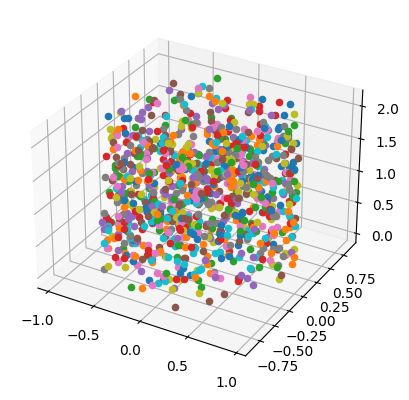

In [166]:
isoms = generate_c3_isoms(1000, 1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for isom in isoms:
    ax.scatter(isom[0], isom[1], isom[2], marker='o')
plt.show()

In [146]:

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C3_correct(isoms[i], isoms[j],2)

In [1]:
# j should be divisible by 4
def march_c3_isoms(j = 1000, a = 1):
    j = math.ceil(j / 4)
    isoms = []
    tri = (math.sqrt(3) / 2)
    steps = np.linspace(0, a, j)
    
    for elem in steps:
        isoms.append((elem * 1.5 , -tri * elem, 0))    

    for elem in steps:
        isoms.append((a/2 + elem * 1.5, tri * elem - tri * a, 0))
        
    rotation = np.linspace(0, (2 * math.pi / 3), j)
    for elem in rotation:
        isoms.append((0, 0, elem))
    for elem in rotation:
        isoms.append((a / 2, -tri * a, elem))
        
    return isoms

In [2]:
isoms2 = march_c3_isoms(1000, 2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.axis('square')
plt.xlim(0, 6)
plt.ylim(-3, 3)
ax.set_zlim(0,3)
for isom in isoms2:
    ax.scatter(isom[0], isom[1], isom[2], marker='o')

plt.show()

NameError: name 'math' is not defined

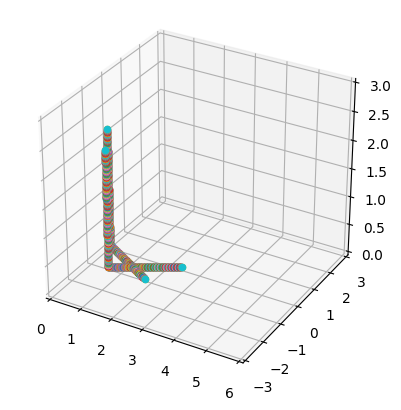

In [190]:
isoms3 = march_c3_isoms(1000, 2 * pi / (3 * math.sqrt(3)))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.axis('square')
plt.xlim(0, 6)
plt.ylim(-3, 3)
ax.set_zlim(0,3)
for isom in isoms2:
    ax.scatter(isom[0], isom[1], isom[2], marker='o')

plt.show()

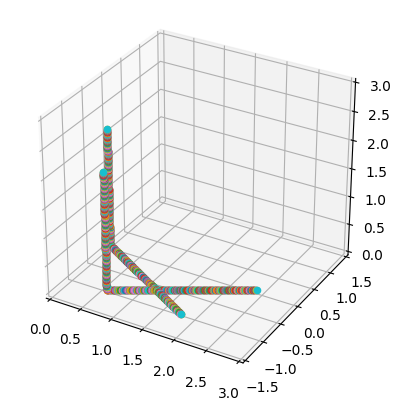

In [192]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.axis('square')
plt.xlim(0, 3)
plt.ylim(-1.5, 1.5)
ax.set_zlim(0,3)
for isom in isoms3:
    ax.scatter(isom[0], isom[1], isom[2], marker='o')

plt.show()

True


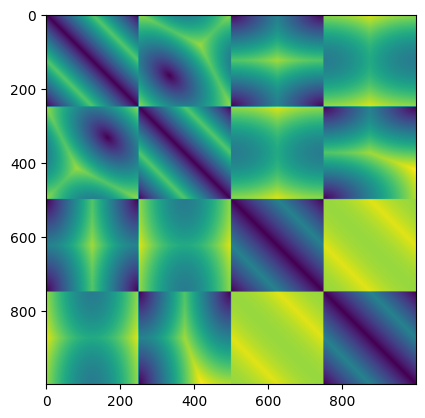

In [194]:
B3 = pairwise_distances(isoms3, metric = distance_C3_metric(2 * pi / (3 * math.sqrt(3))), n_jobs = -1)
print((sq.transpose() == sq).all())
plt.figure()
plt.imshow(B)
plt.show()

[0.6897204555571079, 0.6897204555571079, 0.6897204555571079, 0.6897204555571079, 2.9325485229492188e-05, 2.9325485229492188e-05]


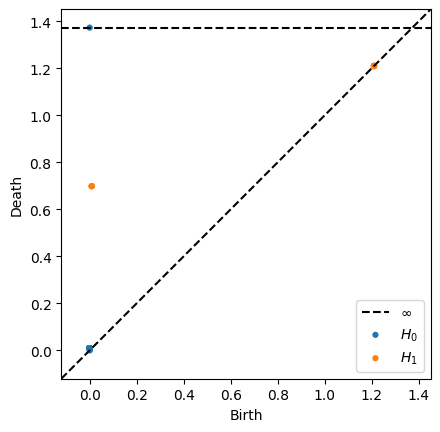

In [198]:
output = ripser(B3, maxdim = 1, coeff = 2, distance_matrix = True)
persistingPoints(output,simpDim = 1)
plt.figure()
dgms = output['dgms']
plot_diagrams(dgms)

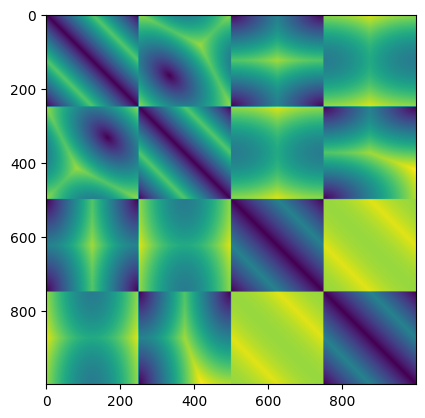

In [96]:
march = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        march[i][j] = distance_C3_correct(isoms2[i], isoms2[j],2)
plt.figure()
plt.imshow(march)
plt.show()

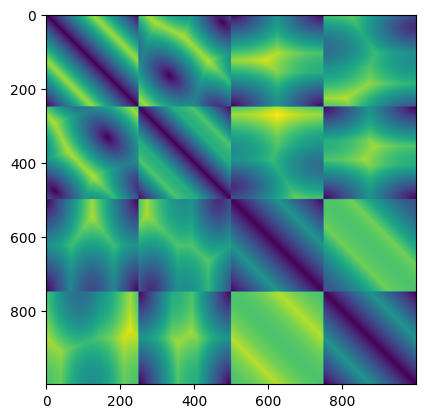

In [48]:
march2 = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        march2[i][j] = distance_C3(isoms2[i], isoms2[j],2)
plt.figure()
plt.imshow(march2)
plt.show()

False
0.0
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


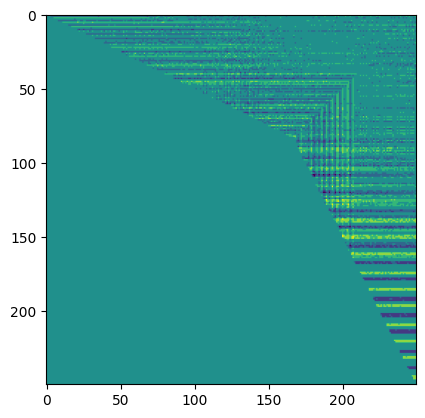

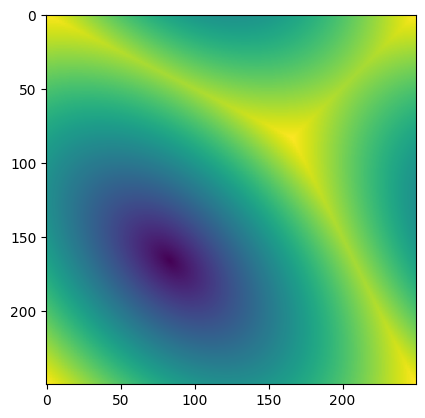

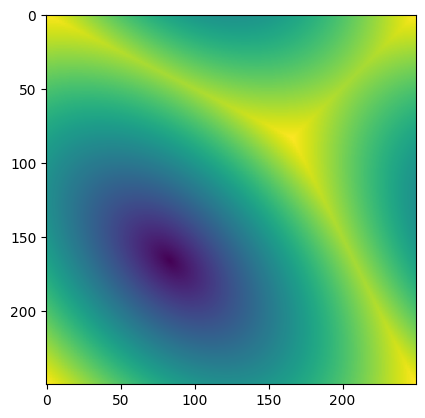

In [195]:
# print(distance_C3(isoms2[600],isoms2[900],2))
# print(distance_C3(isoms2[900],isoms2[600],2))

print((march.transpose() == march).all())
print((march[0:250,250:500])[150,50] - np.rot90(np.fliplr(march[250:500,0:250]))[150,50])
print((march[0:250,250:500]) == np.rot90(np.fliplr(march[250:500,0:250])))
plt.figure()
plt.imshow(march[0:250,250:500] - np.rot90(np.fliplr(march[250:500,0:250])))
plt.show()
plt.figure()
plt.imshow(march[0:250,250:500])
plt.show()
plt.figure()
plt.imshow(np.rot90(np.fliplr(march[250:500,0:250])))
plt.show()
# print(distance_C3_correct(isoms2[600],isoms2[900],2))
# print(distance_C3_correct(isoms2[900],isoms2[600],2))

True


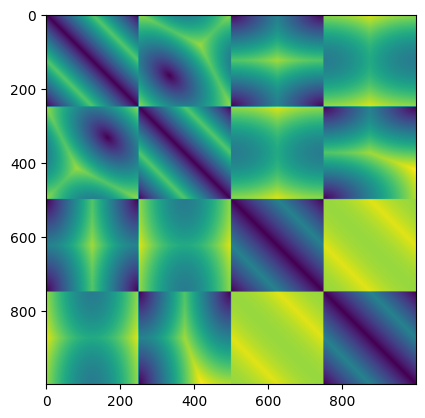

In [186]:
B = pairwise_distances(isoms2, metric = distance_C3_metric(2), n_jobs = -1)
print((sq.transpose() == sq).all())
plt.figure()
plt.imshow(B)
plt.show()

In [206]:
# Initialize
import sklearn.cluster
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(B, projection=[0,1]) # X-Y axis

# Create a cover with 10 elements
cover = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, B, cover=cover, clusterer = sklearn.cluster.DBSCAN(metric="precomputed"),
                  precomputed = True)

# Visualize it
_ = mapper.visualize(graph, path_html="output/make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

## Uncomment the below to view the above-generated visualization
#
# jupyter.display(path_html="output/make_circles_keplermapper_output.html")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 1000)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (1000, 1000) using lens shaped (1000, 2)

Creating 100 hypercubes.

Created 144 edges and 60 nodes in 0:00:00.222803.
Wrote visualization to: output/make_circles_keplermapper_output.html


In [17]:
print(distance_C3(isoms2[0],isoms2[249],2))
print(distance_C3(isoms2[250],isoms2[499],2))
print(distance_C3(isoms2[500],isoms2[749],2))
print(distance_C3(isoms2[750],isoms2[999],2))

0.0
0.0
0.0
0.0


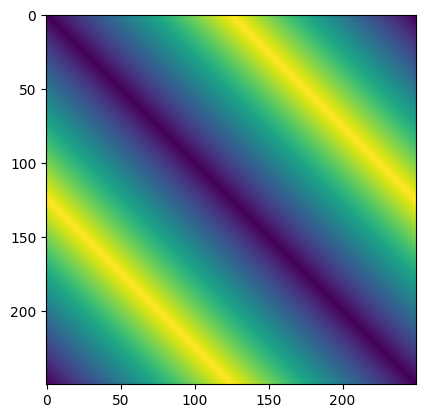

In [101]:
plt.figure()
plt.imshow(march[0:250,:250])
plt.show()

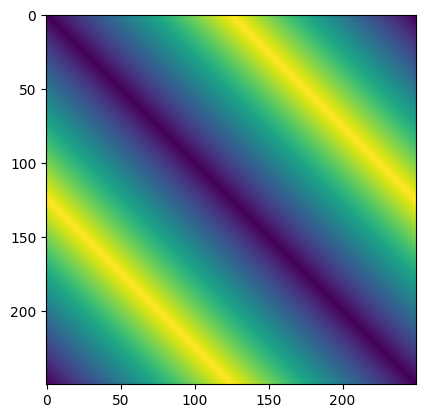

In [102]:
plt.figure()
plt.imshow(march[250:500,250:500])
plt.show()

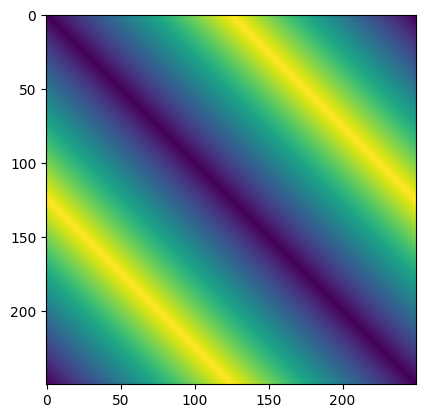

In [103]:
plt.figure()
plt.imshow(march[500:750,500:750])
plt.show()

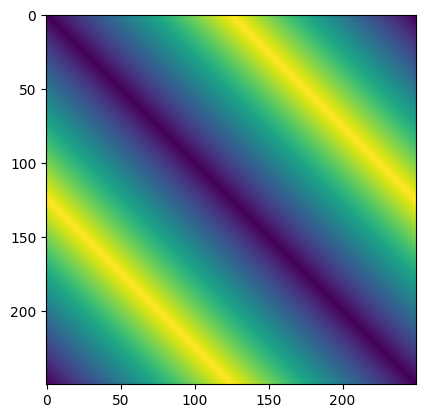

In [104]:
plt.figure()
plt.imshow(march[750:,750:])
plt.show()

In [139]:
# (march == B).all()
tri = math.sqrt(3) / 2
pi2 = 2 * pi / 3
print(march[750,999])
print(march[999,750])
print('')
print(distance_C3_correct(isoms2[999],isoms2[750],2))
print(distance_C3_correct(isoms2[750],isoms2[999],2))
print(distance_C3(isoms2[999],isoms2[750],2))
print(distance_C3(isoms2[750],isoms2[999],2))

print(distance_C3_correct((-.5,-tri,0),(-.5,-tri,2 * math.pi / 3),1))
# print(distance_C3((.5,-tri,0),(.5,-tri,2 * math.pi / 3),1))
print('')
print(distance_C3_correct((0,0,0),(0,0,0),1))
print(distance_C3_correct((0,0,0),(-1.5,-tri,0),1))
print(distance_C3_correct((0,0,0),(-1.5,tri,0),1))
print(distance_C3_correct((0,0,0),(0,0,pi2),1))
print(distance_C3_correct((0,0,0),(-1.5,tri,pi2),1))
print(distance_C3_correct((0,0,0),(-1.5,-tri,pi2),1))
print(distance_C3_correct((-.5,-tri,0),(1,0,0),1))
print(distance_C3_correct((-.5,-tri,0),(-.5,-tri,0),1))
print(distance_C3_correct((-.5,-tri,0),(-.5,tri,0),1))
print(distance_C3_correct((-.5,-tri,0),(1,0,pi2),1))
print(distance_C3_correct((-.5,-tri,0),(-.5,-tri,pi2),1))
print(distance_C3_correct((-.5,-tri,0),(-.5,tri,pi2),1))

# print(isoms2[750])
# print(isoms2[999])

2.220446049250313e-16
2.220446049250313e-16

2.220446049250313e-16
2.220446049250313e-16
0.0
0.0
1.1102230246251565e-16

0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16


[1.1407884629443288, 1.1407884629443288, 0.6897204555571079, 0.6897204555571079]


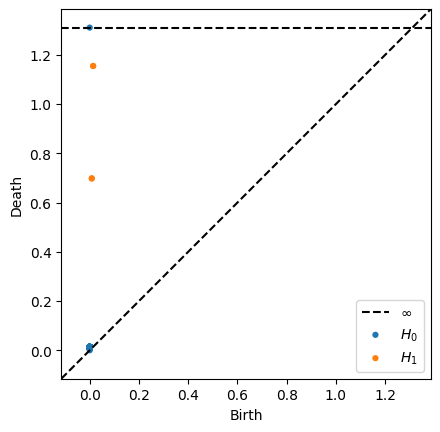

In [140]:
output = ripser(march, maxdim = 1, coeff = 2, distance_matrix = True)
persistingPoints(output,simpDim = 1)
plt.figure()
dgms = output['dgms']
plot_diagrams(dgms)

[1.1407884629443288, 1.1407884629443288, 0.6897204555571079, 0.6897204555571079]


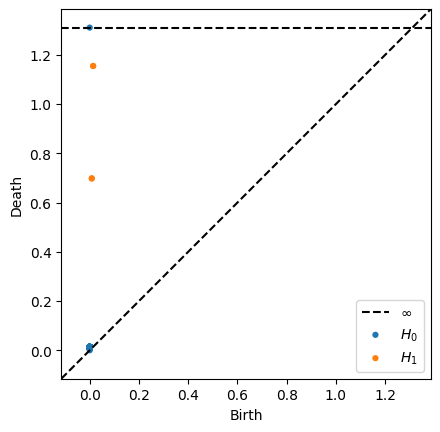

In [141]:
output = ripser(march, maxdim = 1, coeff = 3, distance_matrix = True)
persistingPoints(output,simpDim = 1)
plt.figure()
dgms = output['dgms']
plot_diagrams(dgms)

[0.5194852352142334, 0.5075575858354568, 0.2392585277557373, 0.23831070959568024, 0.2357562929391861, 0.23471128940582275]


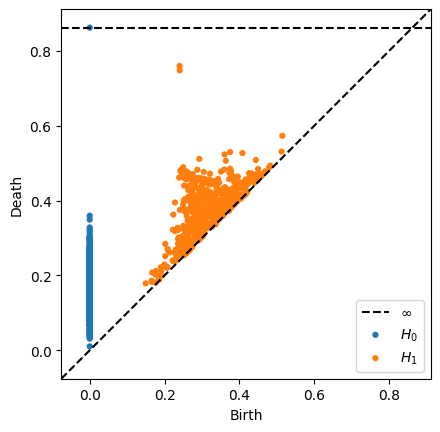

In [149]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
persistingPoints(output,simpDim = 1)
plt.figure()
dgms = output['dgms']
plot_diagrams(dgms)

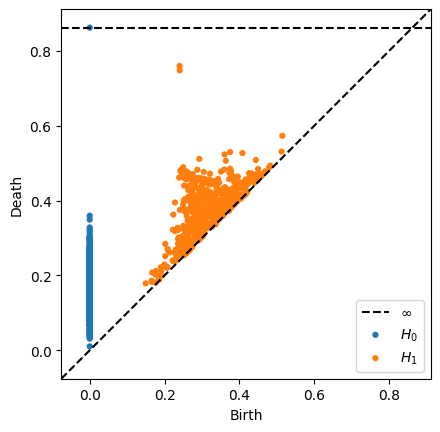

In [150]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
#persistingPoints(output,simpDim = 1)
plt.figure()
thing = output['dgms']
plot_diagrams(thing)

[0.5544869303703308, 0.15609565377235413, 0.14663265645503998, 0.143207386136055, 0.14280235767364502, 0.1408800482749939]


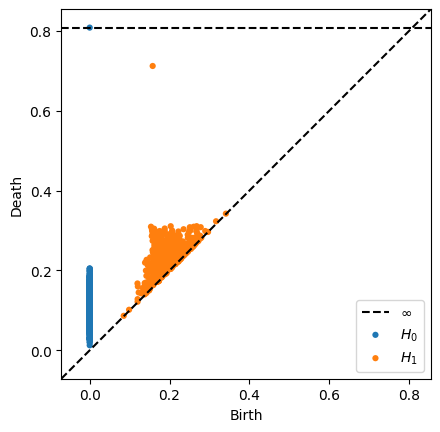

In [167]:
output = ripser(np.asarray(isoms), maxdim = 1, coeff = 2, metric = distance_C3_metric(1))
persistingPoints(output,simpDim = 1)
plt.figure()
thing = output['dgms']
plot_diagrams(thing)

[0.5544869303703308, 0.43232104182243347, 0.14663265645503998, 0.143207386136055, 0.14280235767364502, 0.1408800482749939]


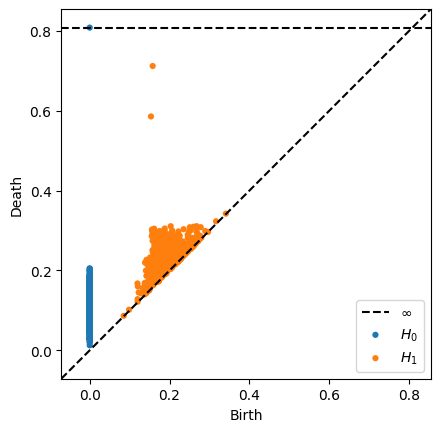

In [168]:
output = ripser(np.asarray(isoms), maxdim = 1, coeff = 3, metric = distance_C3_metric(1))
persistingPoints(output,simpDim = 1)
plt.figure()
thing = output['dgms']
plot_diagrams(thing)

In [24]:
# see how many points are persisting
def persistingPoints(res,simpDim = 1):
    Hn = res['dgms'][simpDim].tolist() # all intervals in simpDim
    d = []
    for pair in Hn: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in Hn
    d.sort(reverse = True) # sorting from longest to shortest intervals
    print(d[:6])